In [3]:
from keras import  datasets
from keras.layers import Input, Dense, Flatten
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.src.engine.training import Model
import numpy as np
from numpy import argmax
from sklearn.metrics import accuracy_score,  confusion_matrix

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
input = Input(shape=(28,28))
x1 = Flatten()(input)
x2 = Dense(120, activation = 'tanh')(x1)
x3 = Dense(84, activation = 'tanh')(x2)
output = Dense(10, activation = 'softmax', name='name1')(x3)
model = Model(inputs=input, outputs = output, name='mnist_model')
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 name1 (Dense)               (None, 10)                850       
                                                                 
Total params: 105214 (410.99 KB)
Trainable params: 105214 (410.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
results= model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.3436 - accuracy: 0.9028 - val_loss: 0.1915 - val_accuracy: 0.9436
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1620 - accuracy: 0.9528 - val_loss: 0.1332 - val_accuracy: 0.9596
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1140 - accuracy: 0.9657 - val_loss: 0.1050 - val_accuracy: 0.9665
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.0924 - val_accuracy: 0.9730
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.0840 - val_accuracy: 0.9735
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.0757 - val_accuracy: 0.9764
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0814 - val_accuracy: 0.9743
Epoch 

In [8]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9774


In [9]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [10]:
y_pred1=argmax(y_pred,axis=1)

In [11]:
print(confusion_matrix(y_test,y_pred1))
accuracy_score(y_test,y_pred1)*100

[[ 965    0    2    1    0    2    5    1    3    1]
 [   0 1124    3    0    0    1    2    1    4    0]
 [   3    0 1012    2    1    0    1    5    7    1]
 [   1    1    4  967    2   19    0    6    5    5]
 [   1    0    3    0  953    0    2    1    0   22]
 [   3    0    0    4    1  872    3    0    5    4]
 [   5    1    3    1    5    3  937    0    3    0]
 [   2    2    6    1    1    0    0 1008    3    5]
 [   4    0    2    3    1    5    1    5  950    3]
 [   1    2    0    3    8    3    0    6    0  986]]


97.74000000000001

[7.5414377e-08 6.5630401e-10 3.5178857e-07 3.2234371e-09 9.9999684e-01
 8.7951676e-08 1.9420071e-07 1.5991503e-06 3.9632720e-08 6.3510458e-07]
4


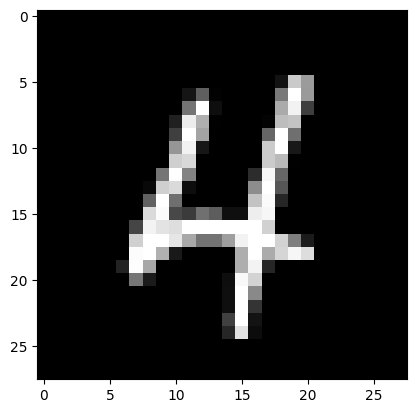

In [12]:
plt.imshow(x_test[660].reshape(28,28),cmap="gray")
print(y_pred[660])
print(y_pred1[660])

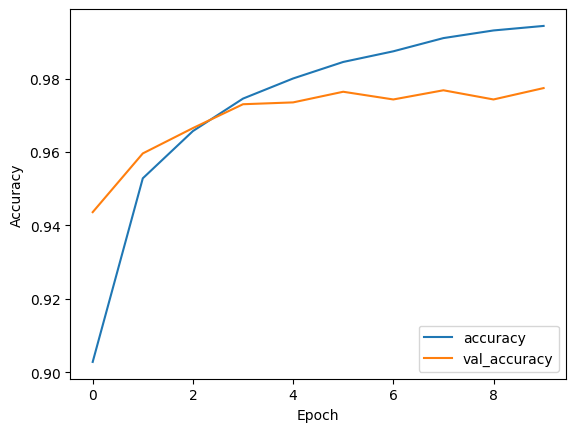

In [13]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')